<a href="https://colab.research.google.com/github/PsorTheDoctor/artificial-intelligence/blob/master/computer_vision/particle_filter/particle_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Particle Filter

In [1]:
import numpy as np
from pylab import *
from itertools import zip_longest as zip
import time
from IPython import display

In [12]:
def resample(weights):
  n = len(weights)
  indices = []
  C = [0.] + [sum(weights[:i+1]) for i in range(n)]
  u0, j = random(), 0

  for u in [(u0+i)/n for i in range(n)]:
    while u > C[j]:
      j += 1
    indices.append(j - 1)

  return indices

def particleFilter(sequence, pos, stepSize, n):
  seq = iter(sequence)
  x = np.ones((n, 2), int) * pos
  f0 = next(seq)[tuple(pos)] * np.ones(n)
  yield pos, x, ones(n)/n

  for im in seq:
    np.add(x, np.random.uniform(-stepSize, stepSize, x.shape), out=x, casting='unsafe')
    x = x.clip(np.zeros(2), np.array(im.shape)-1).astype(int)
    f = im[tuple(x.T)]
    w = 1./(1. + (f0-f)**2)
    w /= sum(w)
    yield sum(x.T*w, axis=1), x, w

    if 1./sum(w**2) < n/2.:
      x = x[resample(w), :]

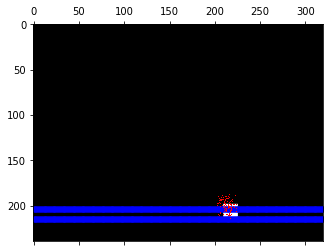

None

In [14]:
# Create 30 frames long image sequence
seq = [im for im in np.zeros((30, 240, 320), int)]
# Add a square with start position
x0 = np.array([120, 160])
xs = np.vstack((arange(30)*3, arange(30)*2)).T + x0

for t, x in enumerate(xs):
  xslice = slice(x[0] - 8, x[0] + 8)
  yslice = slice(x[1] - 8, x[1] + 8)
  seq[t][xslice, yslice] = 255

for im, p in zip(seq, particleFilter(seq, x0, 8, 100)):
  pos, xs, ws = p
  position_overlay = np.zeros_like(im)
  position_overlay[np.array(pos).astype(int)] = 1
  particle_overlay = np.zeros_like(im)
  particle_overlay[tuple(xs.T)] = 1
  draw()
  time.sleep(0.3)

  clf()
  imshow(im, cmap=cm.gray)
  spy(position_overlay, marker='.', color='b')
  spy(particle_overlay, marker=',', color='r')
  display.clear_output(wait=True)
  display.display(show())